# Insurance Upselling Data Preprocessing - Data Wizard
* Dzulfikar Hanif Maulana (Ketua)
* Abdul Hardia Amin
* Haerunnisa
* Muhammad Fadhil Pasaribu
* Nisrina Widya Nur Farhani

# Load Dataset

In [92]:
# Load library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import MinMaxScaler

sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [93]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
# Change directory to a folder in Google Drive
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [95]:
# Load dataset from gdrive
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset_Insurance Upselling.csv') # Jngan diubah

df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1.0,Male,44,1,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217,1
1,2.0,Male,76,1,3.0,0.0,1-2 Year,No,33536.0,26.0,183,0
2,3.0,Male,47,1,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27,1
3,4.0,Male,21,1,11.0,1.0,< 1 Year,No,28619.0,152.0,203,0
4,5.0,Female,29,1,41.0,1.0,< 1 Year,No,27496.0,152.0,39,0


# DATA CLEANSING

## Handle Missing Values

In [96]:
# Checking missing values each column
print(df.isnull().sum())

id                      3678
Gender                  3357
Age                        0
Driving_License            0
Region_Code                0
Previously_Insured      1999
Vehicle_Age                0
Vehicle_Damage          1093
Annual_Premium             0
Policy_Sales_Channel     541
Vintage                    0
Response                   0
dtype: int64


In [97]:
# Fill kolom 'id' dengan meneruskan row yang hilang
df.loc[df[df['id'].isna()].index, 'id'] = df[df['id'].isna()].index + 1

# Fill kolom 'Gender' dengan nilai mode
df['Gender'].fillna(value=df['Gender'].mode()[0], inplace=True)

# Drop nan values pada semua kolom
df = df.dropna()

print(df.isnull().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


## Handle Duplicated Data

In [98]:
# Checkig duplicate data
df.duplicated().any()

True

In [99]:
# Checking duplicated data after cleaning
df = df.drop_duplicates()
df.duplicated().any()

False

## Change Data Types

In [100]:
# Mengubah data type pada kolom yang ditentukan
df= df.astype({
    'id' : 'int',
    'Region_Code' : 'int',
    'Previously_Insured' : 'int',
    'Annual_Premium' : 'int',
    'Policy_Sales_Channel' : 'int',
})

In [101]:
# Checking all over dataset after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378137 entries, 0 to 400130
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    378137 non-null  int64 
 1   Gender                378137 non-null  object
 2   Age                   378137 non-null  int64 
 3   Driving_License       378137 non-null  int64 
 4   Region_Code           378137 non-null  int64 
 5   Previously_Insured    378137 non-null  int64 
 6   Vehicle_Age           378137 non-null  object
 7   Vehicle_Damage        378137 non-null  object
 8   Annual_Premium        378137 non-null  int64 
 9   Policy_Sales_Channel  378137 non-null  int64 
 10  Vintage               378137 non-null  int64 
 11  Response              378137 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 37.5+ MB


## Feature Encoding

In [102]:
# Label Encoding
label_encoder = LabelEncoder()
df['Gender_Label'] = label_encoder.fit_transform(df['Gender'])
df['Vehicle_Damage_Label'] = label_encoder.fit_transform(df['Vehicle_Damage'])

In [103]:
# One Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Vehicle_Age'], drop_first=False, dtype=int)
df_cleaned = df_encoded.copy()
df_cleaned.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Label,Vehicle_Damage_Label,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,Male,44,1,28,0,Yes,40454,26,217,1,1,1,0,0,1
1,2,Male,76,1,3,0,No,33536,26,183,0,1,0,1,0,0
2,3,Male,47,1,28,0,Yes,38294,26,27,1,1,1,0,0,1
3,4,Male,21,1,11,1,No,28619,152,203,0,1,0,0,1,0
4,5,Female,29,1,41,1,No,27496,152,39,0,0,0,0,1,0


In [104]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378137 entries, 0 to 400130
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   id                     378137 non-null  int64 
 1   Gender                 378137 non-null  object
 2   Age                    378137 non-null  int64 
 3   Driving_License        378137 non-null  int64 
 4   Region_Code            378137 non-null  int64 
 5   Previously_Insured     378137 non-null  int64 
 6   Vehicle_Damage         378137 non-null  object
 7   Annual_Premium         378137 non-null  int64 
 8   Policy_Sales_Channel   378137 non-null  int64 
 9   Vintage                378137 non-null  int64 
 10  Response               378137 non-null  int64 
 11  Gender_Label           378137 non-null  int64 
 12  Vehicle_Damage_Label   378137 non-null  int64 
 13  Vehicle_Age_1-2 Year   378137 non-null  int64 
 14  Vehicle_Age_< 1 Year   378137 non-null  int64 
 15  Vehic

## Handle Outliers

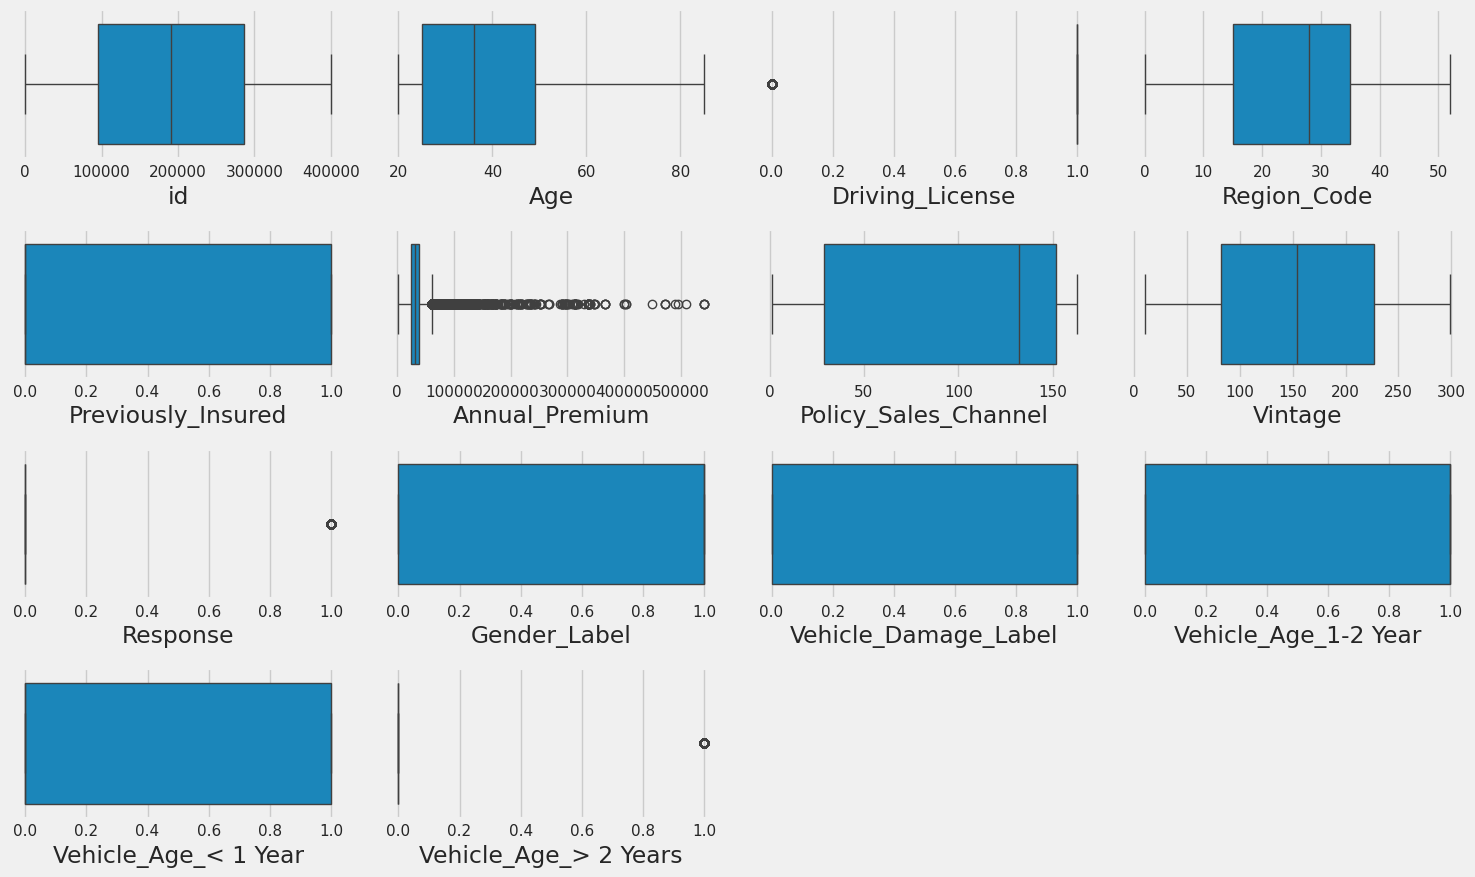

In [105]:
# Check dengan boxplot
cols = 4
rows = 4
num_cols = df_cleaned.select_dtypes(exclude='object').columns
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(num_cols):

    ax=fig.add_subplot( rows, cols, i+1)

    sns.boxplot(x=df_cleaned[col], ax=ax)

fig.tight_layout()
plt.show()


In [106]:
#check kolom annual premium
df_cleaned[['Annual_Premium']].describe()

,Annual_Premium
count,378137.000000
mean,30565.969865
std,17209.746438
min,2630.000000
25%,24408.000000
50%,31671.000000
75%,39400.000000
max,540165.000000


In [107]:
Q1=df_cleaned[['Annual_Premium']].quantile(0.25)
Q3=df_cleaned[['Annual_Premium']].quantile(0.75)
IQR=Q3-Q1
IQR

Annual_Premium    14992.0
dtype: float64

In [108]:
lower_lim= int(Q1 - 1.5 * IQR)
upper_lim= int(Q3 + 1.5 * IQR)

<ipython-input-108-982515da67c6>:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  lower_lim= int(Q1 - 1.5 * IQR)
<ipython-input-108-982515da67c6>:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  upper_lim= int(Q3 + 1.5 * IQR)


In [109]:
lower_lim

1920

In [110]:
upper_lim

61888

In [111]:
#Handle outlier di annual premium
out_low = (df_cleaned['Annual_Premium'] < lower_lim)
out_up = (df_cleaned['Annual_Premium'] > upper_lim)

In [112]:
outliers=df_cleaned['Annual_Premium'][(out_low|out_up)]
outliers

25        61964
37        76251
67        66338
139       62164
149       76651
          ...  
388929    68915
389776    74121
391758    72053
392489    73012
399929    76737
Name: Annual_Premium, Length: 10236, dtype: int64

In [113]:
# drop rows containing outliers
df_cleaned_2= df_cleaned.drop(outliers.index)

In [114]:
df_cleaned_2

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Label,Vehicle_Damage_Label,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,Male,44,1,28,0,Yes,40454,26,217,1,1,1,0,0,1
1,2,Male,76,1,3,0,No,33536,26,183,0,1,0,1,0,0
2,3,Male,47,1,28,0,Yes,38294,26,27,1,1,1,0,0,1
3,4,Male,21,1,11,1,No,28619,152,203,0,1,0,0,1,0
4,5,Female,29,1,41,1,No,27496,152,39,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400031,356867,Female,66,1,28,1,No,40251,26,69,0,0,0,1,0,0
400066,400067,Male,45,1,8,0,Yes,2630,26,282,0,1,1,0,0,1
400077,133162,Male,73,1,8,0,Yes,37065,124,117,0,1,1,1,0,0
400102,254355,Male,26,1,50,1,No,34724,152,291,0,1,0,0,1,0


In [115]:
df_cleaned_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367901 entries, 0 to 400130
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   id                     367901 non-null  int64 
 1   Gender                 367901 non-null  object
 2   Age                    367901 non-null  int64 
 3   Driving_License        367901 non-null  int64 
 4   Region_Code            367901 non-null  int64 
 5   Previously_Insured     367901 non-null  int64 
 6   Vehicle_Damage         367901 non-null  object
 7   Annual_Premium         367901 non-null  int64 
 8   Policy_Sales_Channel   367901 non-null  int64 
 9   Vintage                367901 non-null  int64 
 10  Response               367901 non-null  int64 
 11  Gender_Label           367901 non-null  int64 
 12  Vehicle_Damage_Label   367901 non-null  int64 
 13  Vehicle_Age_1-2 Year   367901 non-null  int64 
 14  Vehicle_Age_< 1 Year   367901 non-null  int64 
 15  Vehic

## Feature Transformation

In [116]:
# Create a new column with log transformation values
df_cleaned_2['Annual_Premium_Log'] = np.log(df_cleaned_2['Annual_Premium'])


In [117]:
df_cleaned_2.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Label,Vehicle_Damage_Label,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Annual_Premium_Log
0,1,Male,44,1,28,0,Yes,40454,26,217,1,1,1,0,0,1,10.607921
1,2,Male,76,1,3,0,No,33536,26,183,0,1,0,1,0,0,10.420375
2,3,Male,47,1,28,0,Yes,38294,26,27,1,1,1,0,0,1,10.553049
3,4,Male,21,1,11,1,No,28619,152,203,0,1,0,0,1,0,10.261826
4,5,Female,29,1,41,1,No,27496,152,39,0,0,0,0,1,0,10.221796


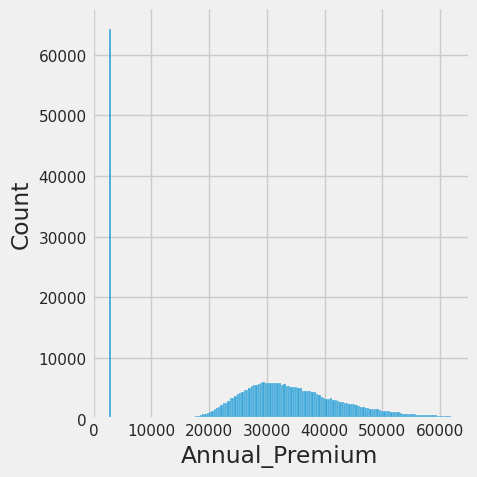

In [118]:
sns.displot(df_cleaned_2, x="Annual_Premium")

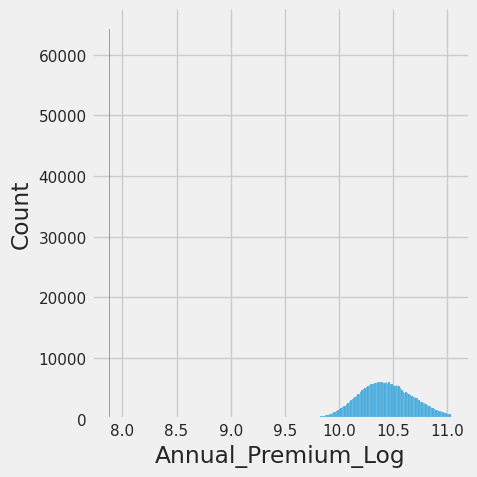

In [119]:
sns.displot(df_cleaned_2, x="Annual_Premium_Log")

In [120]:
df_cleaned_2.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Label,Vehicle_Damage_Label,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Annual_Premium_Log
0,1,Male,44,1,28,0,Yes,40454,26,217,1,1,1,0,0,1,10.607921
1,2,Male,76,1,3,0,No,33536,26,183,0,1,0,1,0,0,10.420375
2,3,Male,47,1,28,0,Yes,38294,26,27,1,1,1,0,0,1,10.553049
3,4,Male,21,1,11,1,No,28619,152,203,0,1,0,0,1,0,10.261826
4,5,Female,29,1,41,1,No,27496,152,39,0,0,0,0,1,0,10.221796


## Handle Class Imbalance

In [121]:
df_cleaned_2['Response_Class'] = df_cleaned_2['Response'] == 1
print(df_cleaned_2['Response_Class'].value_counts())

Response_Class
False    323112
True      44789
Name: count, dtype: int64


In [122]:
X = df_cleaned_2[[col for col in df_cleaned_2.columns if (str(df_cleaned_2[col].dtype) != 'object') and col not in ['Response', 'Response_class']]]
y = df_cleaned_2['Response_Class'].values
print(X.shape)
print(y.shape)

(367901, 15)
(367901,)


In [123]:
from imblearn import under_sampling, over_sampling
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X, y)

In [124]:
print(pd.Series(y_over_SMOTE).value_counts())

True     323112
False    323112
Name: count, dtype: int64


In [125]:
df_cleaned_2 = pd.DataFrame(X_over_SMOTE, columns=X.columns)
df_cleaned_2['Response_Class'] = y_over_SMOTE

In [126]:
class_counts = df_cleaned_2['Response_Class'].value_counts()
print(class_counts)

Response_Class
True     323112
False    323112
Name: count, dtype: int64


In [127]:
#encoding response class menjadi 0 1
df_cleaned_2['Response_Class'] = label_encoder.fit_transform(df_cleaned_2['Response_Class'])

# Feature Engineering

## Feature Selection

In [128]:
df_cleaned_2.head(2)

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Label,Vehicle_Damage_Label,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Annual_Premium_Log,Response_Class
0,1,44,1,28,0,40454,26,217,1,1,0,0,1,10.607921,1
1,2,76,1,3,0,33536,26,183,1,0,1,0,0,10.420375,0


In [129]:
df_cleaned_2.columns

Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Gender_Label',
       'Vehicle_Damage_Label', 'Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year',
       'Vehicle_Age_> 2 Years', 'Annual_Premium_Log', 'Response_Class'],
      dtype='object')

In [131]:
from sklearn.feature_selection import chi2

X = df_cleaned_2.drop(columns=['id', 'Age','Annual_Premium','Region_Code', 'Vintage','Policy_Sales_Channel', 'Response_Class', 'Annual_Premium_Log'])
y = df_cleaned_2['Response_Class']

chi2_stat, p_val = chi2(X, y)

results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Stat': chi2_stat,
    'p-value': p_val
})

print(results)

                 Feature      Chi2 Stat        p-value
0        Driving_License       0.043242   8.352709e-01
1     Previously_Insured  168505.590385   0.000000e+00
2           Gender_Label    5401.259911   0.000000e+00
3   Vehicle_Damage_Label   63418.316513   0.000000e+00
4   Vehicle_Age_1-2 Year    2555.709344   0.000000e+00
5   Vehicle_Age_< 1 Year  115425.020867   0.000000e+00
6  Vehicle_Age_> 2 Years     506.640174  3.413668e-112


In [132]:
#feature selection
features_to_use = ['Age', 'Region_Code','Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response_Class', 'Gender_Label',
       'Vehicle_Damage_Label', 'Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year','Vehicle_Age_> 2 Years', 'Annual_Premium_Log']

df_selected = df_cleaned_2[features_to_use]

df_selected.head(2)

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response_Class,Gender_Label,Vehicle_Damage_Label,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Annual_Premium_Log
0,44,28,0,40454,26,217,1,1,1,0,0,1,10.607921
1,76,3,0,33536,26,183,0,1,0,1,0,0,10.420375


## Feature Extraction

In [133]:
# Jumlah Klaim Sebelumnya
df_selected['Previous_Claims_Count'] = df_selected['Previously_Insured'] * df_selected['Vehicle_Damage_Label']

# Durasi Kepemilikan Kendaraan
df_selected['Ownership_Duration'] = df_selected['Vintage'] * (df_selected['Vehicle_Age_1-2 Year'] + 2 * df_selected['Vehicle_Age_< 1 Year'] + 3 * df_selected['Vehicle_Age_> 2 Years'])

# Frekuensi Penggunaan Policy Sales Channel
sales_channel_freq = df_selected.groupby('Policy_Sales_Channel').size().reset_index(name='Sales_Channel_Frequency')
df_selected = pd.merge(df_selected, sales_channel_freq, on='Policy_Sales_Channel', how='left')

# Indeks Keterlibatan Pelanggan
df_selected['Customer_Engagement_Index'] = (df_selected['Vintage'] * df_selected['Annual_Premium']) / (df_selected['Age'] + 1)

df_new = df_selected
df_new.sample(5)

<ipython-input-133-2d7fdd473719>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Previous_Claims_Count'] = df_selected['Previously_Insured'] * df_selected['Vehicle_Damage_Label']


,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response_Class,Gender_Label,Vehicle_Damage_Label,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Annual_Premium_Log,Previous_Claims_Count,Ownership_Duration,Sales_Channel_Frequency,Customer_Engagement_Index
587882,51,31,0,39505,26,251,1,1,1,1,0,0,10.584192,0,251,111714,190687.596154
215203,24,2,0,34512,152,106,0,1,1,0,1,0,10.449062,0,212,136789,146330.880000
301588,52,28,0,39877,124,151,0,0,0,1,0,0,10.593555,0,151,100345,113611.830189
100731,24,41,1,27765,152,18,0,1,0,0,1,0,10.231532,0,36,136789,19990.800000
69515,22,46,1,30663,152,133,0,0,0,0,1,0,10.330812,0,266,136789,177312.130435


## Ide 4 fitur baru

1. Claim History: Informasi tentang riwayat klaim asuransi sebelumnya. Ini termasuk jumlah klaim yang telah dibuat oleh pemegang asuransi dan frekuensi klaim dalam periode tertentu. Fitur ini bisa memberikan wawasan tentang seberapa sering pelanggan mengajukan klaim, yang dapat membantu dalam menilai risiko mereka.
2. Credit Score: Skor kredit dari pemegang asuransi. Skor kredit sering digunakan dalam industri asuransi untuk menilai risiko karena dapat mencerminkan keandalan finansial individu. Orang dengan skor kredit yang lebih tinggi cenderung dianggap sebagai risiko yang lebih rendah.
3. Employment Status: Status pekerjaan pemegang asuransi, seperti apakah mereka bekerja penuh waktu, paruh waktu, wiraswasta, atau pengangguran. Status pekerjaan dapat memberikan wawasan tentang stabilitas keuangan dan kemampuan untuk membayar premi secara konsisten.
4. Marital Status: Status pernikahan pemegang asuransi. Status pernikahan bisa menjadi indikator penting karena beberapa studi menunjukkan bahwa orang yang menikah mungkin memiliki profil risiko yang berbeda dibandingkan dengan yang belum menikah. Ini bisa mencakup stabilitas hidup dan tanggung jawab yang berbeda